In [ ]:
%pip install seaborn

In [24]:
import simpy
import random
import statistics
import pandas as pd

# ---------------- Parameters ----------------
NUM_FARMERS = 450           # total farmers
NUM_DOCKS = 30              # number of docks
SIM_TIME = 480              # 8 hours (minutes)
random.seed(42)


# ---------------- Simulation Function ----------------
def run_simulation(workers_per_dock, service_time_range, arrival_interval, scenario_name, verbose=False):
    random.seed(42)
    env = simpy.Environment()
    docks = [simpy.Resource(env, capacity=workers_per_dock) for _ in range(NUM_DOCKS)]
    wait_times = []
    total_queue_samples = []
    metrics = {"served": 0, "busy_time": 0.0}

    # Queue monitoring
    def monitor():
        while True:
            total_q = sum(len(d.queue) for d in docks)
            total_queue_samples.append(total_q)
            yield env.timeout(1)

    # Farmer process
    def farmer(env, farmer_id):
        arrival_time = env.now
        dock = random.choice(docks)
        with dock.request() as req:
            yield req
            wait_time = env.now - arrival_time
            wait_times.append(wait_time)

            if verbose:
                print(f"Farmer {farmer_id} starts at {env.now:.2f} (wait {wait_time:.2f} min)")

            service_time = random.uniform(*service_time_range)
            metrics["busy_time"] += service_time
            yield env.timeout(service_time)
            metrics["served"] += 1

            if verbose:
                print(f"Farmer {farmer_id} finished at {env.now:.2f} (service {service_time:.2f} min)")

    # Farmer arrivals
    def generate_farmers(env):
        for i in range(1, NUM_FARMERS + 1):
            env.process(farmer(env, i))
            yield env.timeout(random.expovariate(1 / arrival_interval))

    env.process(monitor())
    env.process(generate_farmers(env))
    env.run(until=SIM_TIME)

    # ---------- Metrics ----------
    avg_wait = round(statistics.mean(wait_times), 2) if wait_times else 0.0
    avg_queue = round(statistics.mean(total_queue_samples), 2) if total_queue_samples else 0.0
    throughput = round(metrics["served"] / SIM_TIME, 2)
    utilization_rate = round((metrics["busy_time"] / (NUM_DOCKS * workers_per_dock * SIM_TIME)) * 100.0, 2)

    return {
        "Scenario": scenario_name,
        "Avg Wait (min)": avg_wait,
        "Avg Queue Length": avg_queue,
        "Throughput (farmers/min)": throughput,
        "Dock Utilization (%)": utilization_rate
    }
# ---------------- Run Simulation with Logging ----------------
results = []

results.append(run_simulation(2, (50, 80), 0.8, "Baseline"))
results.append(run_simulation(4, (30, 50), 0.8, "More Staff"))
results.append(run_simulation(2, (50, 80), 1.5, "Arrival Smoothing"))

# Create DataFrame
df = pd.DataFrame(results)
df = df.round(2)
print("\n=== Dambulla economic center Simulation Results ===")
print(df)

run_simulation(2, (50, 80), 0.8, "Baseline with Log", verbose=True)
#run_simulation(4, (30, 50), 0.8, "More Staff with Log", verbose=True)
#run_simulation(2, (50, 80), 1.5, "Arrival Smoothing with Log", verbose=True)





=== Dambulla economic center Simulation Results ===
            Scenario  Avg Wait (min)  Avg Queue Length  \
0           Baseline           66.54             72.99   
1         More Staff            0.37              0.34   
2  Arrival Smoothing           12.90              9.65   

   Throughput (farmers/min)  Dock Utilization (%)  
0                      0.74                 90.54  
1                      0.94                 31.59  
2                      0.53                 67.90  
Farmer 1 starts at 0.00 (wait 0.00 min)
Farmer 2 starts at 0.82 (wait 0.00 min)
Farmer 3 starts at 1.04 (wait 0.00 min)
Farmer 4 starts at 1.94 (wait 0.00 min)
Farmer 5 starts at 2.66 (wait 0.00 min)
Farmer 6 starts at 2.86 (wait 0.00 min)
Farmer 7 starts at 3.51 (wait 0.00 min)
Farmer 8 starts at 4.14 (wait 0.00 min)
Farmer 9 starts at 4.41 (wait 0.00 min)
Farmer 10 starts at 5.72 (wait 0.00 min)
Farmer 11 starts at 5.98 (wait 0.00 min)
Farmer 12 starts at 6.31 (wait 0.00 min)
Farmer 13 starts at 6.6

{'Scenario': 'Baseline with Log',
 'Avg Wait (min)': 66.54,
 'Avg Queue Length': 72.99,
 'Throughput (farmers/min)': 0.74,
 'Dock Utilization (%)': 90.54}

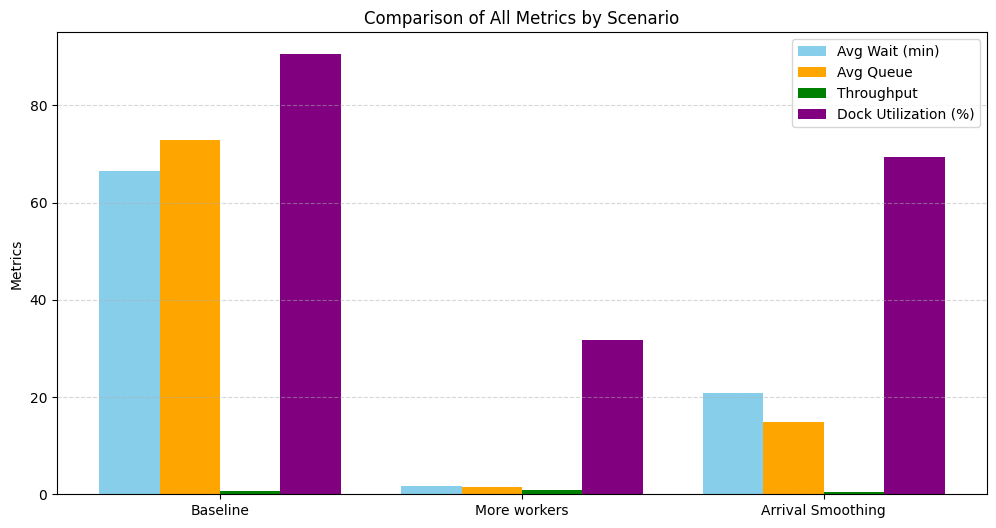

In [1]:
import numpy as np
import matplotlib.pyplot as plt

avg_wait = [66.54, 1.67, 20.81]
avg_queue = [72.99, 1.56, 14.88]
throughput = [0.74, 0.94, 0.55]
utilization = [90.54, 31.66, 69.41]
scenario_name = ["Baseline", "More workers", "Arrival Smoothing"]

x = np.arange(len(scenario_name))
width = 0.2

plt.figure(figsize=(12,6))
plt.bar(x - 1.5*width, avg_wait, width, label='Avg Wait (min)', color='skyblue')
plt.bar(x - 0.5*width, avg_queue, width, label='Avg Queue', color='orange')
plt.bar(x + 0.5*width, throughput, width, label='Throughput', color='green')
plt.bar(x + 1.5*width, utilization, width, label='Dock Utilization (%)', color='purple')

plt.xticks(x, scenario_name)
plt.ylabel("Metrics")
plt.title("Comparison of All Metrics by Scenario")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


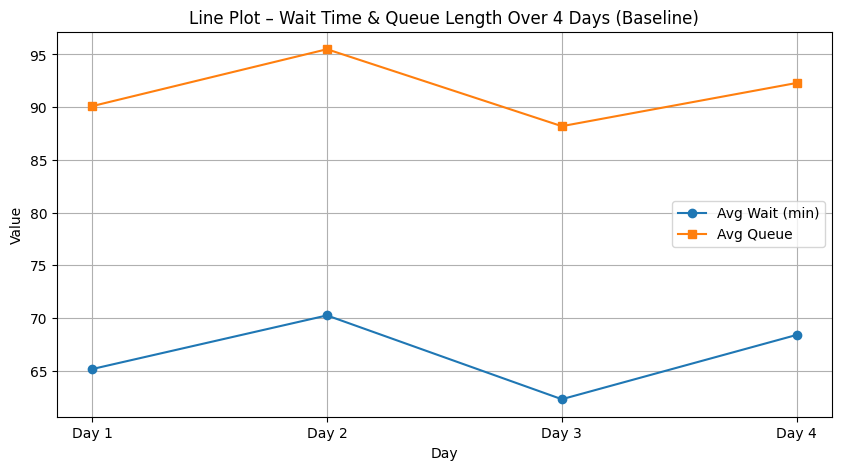

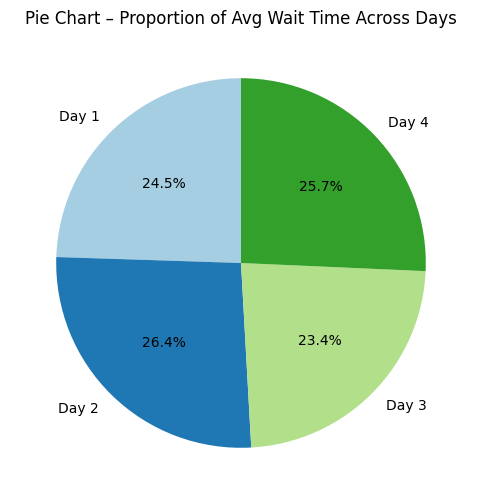

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- Baseline Scenario Demo Dataset ----------------
baseline_data = {
    'Day': ['Day 1', 'Day 2', 'Day 3', 'Day 4'],
    'Avg Wait (min)': [65.16, 70.25, 62.30, 68.40],
    'Avg Queue': [90.10, 95.50, 88.20, 92.30],
    'Throughput (farmers/min)': [0.74, 0.76, 0.73, 0.75],
    'Dock Utilization (%)': [96.1, 95.5, 96.5, 95.8]
}

df_baseline = pd.DataFrame(baseline_data)

# ---------------- 1. Line Plot ----------------
plt.figure(figsize=(10,5))
plt.plot(df_baseline['Day'], df_baseline['Avg Wait (min)'], marker='o', label='Avg Wait (min)')
plt.plot(df_baseline['Day'], df_baseline['Avg Queue'], marker='s', label='Avg Queue')
plt.title('Line Plot – Wait Time & Queue Length Over 4 Days (Baseline)')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



# ---------------- 4. Pie Chart ----------------
# Show proportion of Avg Wait Time per day (for demonstration)
plt.figure(figsize=(6,6))
plt.pie(df_baseline['Avg Wait (min)'], labels=df_baseline['Day'], 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pie Chart – Proportion of Avg Wait Time Across Days')
plt.show()


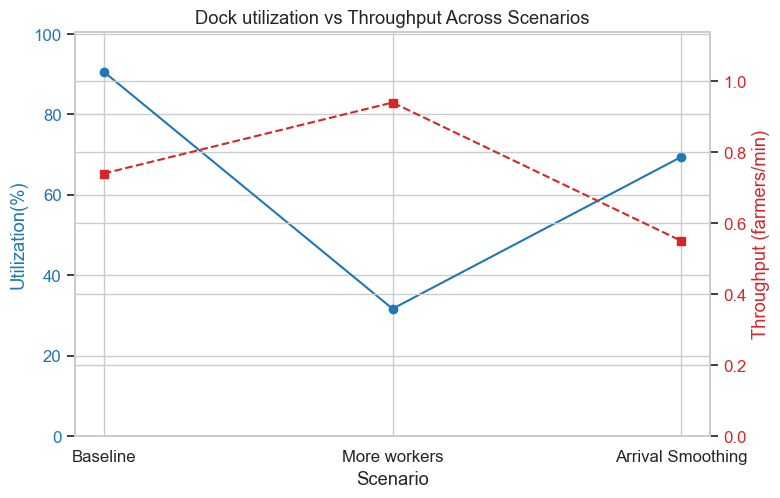

In [8]:
import matplotlib.pyplot as plt

# Example data for illustration
scenarios = ["Baseline", "More workers", "Arrival Smoothing"]
utilization = [90.54, 31.66, 69.41]        # minutes
throughput = [0.74, 0.94, 0.55]  # farmers/min (system-wide)

# Line chart showing how avg wait drops while throughput is similar
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.set_xlabel('Scenario')
ax1.set_ylabel('Utilization(%)', color=color)
ax1.plot(scenarios, utilization, marker='o', color=color, label='Avg Wait Time')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, max(utilization)+10)

ax2 = ax1.twinx()  # second y-axis for throughput
color = 'tab:red'
ax2.set_ylabel('Throughput (farmers/min)', color=color)
ax2.plot(scenarios, throughput, marker='s', color=color, linestyle='--', label='Throughput')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, max(throughput)+0.2)

fig.tight_layout()
plt.title("Dock utilization vs Throughput Across Scenarios")
plt.show()
